<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Proyecto4x4YPF_datos_agrupadossinfiltro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compa√±√≠a YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los pr√≥ximos 4 a√±os. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforaci√≥n y adoptar un enfoque m√°s eficiente en la gesti√≥n financiera. La compa√±√≠a ha logrado reducir los tiempos de perforaci√≥n de aproximadamente un a√±o a 170 d√≠as, mediante mejoras t√©cnicas y operativas.

Este plan de transformaci√≥n busca posicionar a YPF como una empresa m√°s eficiente, rentable y alineada con las tendencias internacionales del sector energ√©tico, con una visi√≥n clara en el desarrollo del shale en Argentina.


## **Modelado**

En la pre entrega 2, realizamos la transformaci√≥n de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en funci√≥n al an√°lisis exploratorio que features tener en consideraci√≥n para el modelado.

Como observamos anteriormente tanto la producci√≥n de petr√≥leo como la producci√≥n de gas son dos datos que queremos predecir para los pr√≥ximos 4 a√±os, sin embargo el an√°lisis estar√° centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales √°reas de permiso de concesi√≥n tanto para la producci√≥n de petr√≥leo como para la producci√≥n de gas.

As√≠ como tambi√©n tenemos que mencionar que el dataset est√° centrado √∫nicamente en la producci√≥n de lo no convencional, es decir, de aquella extracci√≥n que requiere tecnolog√≠as m√°s avanzadas, costosas o intensivas en recursos debido a las caracter√≠sticas del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producci√≥n de petr√≥leo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian seg√∫n el tipo de roca y suelen requerir t√©cnicas como la fractura hidr√°ulica (fracking) para su extracci√≥n. Mientras que el shale se extrae de la roca sedimentaria rica en materia org√°nica que act√∫a como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.


In [8]:
#descargamos todas las librer√≠as necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la funci√≥n head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                      1                               0   
1                      1                               0   
2                      1                               0   
3                      1                               0   
4                      1                               0   

   Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                       0                         0                      0   
1                       0                         0                      0   
2                       0                         0                      0   
3                       0                         0                      0   
4                       0                         0                      0   

   Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                                1                         1   
1                                1                         1   
2                                1                         1   
3                                1                         1   
4                                1                         1   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                         0                                                1   
1                         0                                                1   
2                         0                                                1   
3                         0                                                1   
4                         0                                                1   

   Area de permiso de concesion_AGUADA DEL CHA√ëAR  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   

   Area de permiso de concesion_NARAMBUENA  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Area de permiso de concesion_OCTOGONO  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Area de permiso de concesion_VALLE DEL RIO GRANDE  Produccion de Petroleo  \
0                                                  0                     555   
1                                                  0                     472   
2                                                  0                    1082   
3                                                  0                     678   
4                              

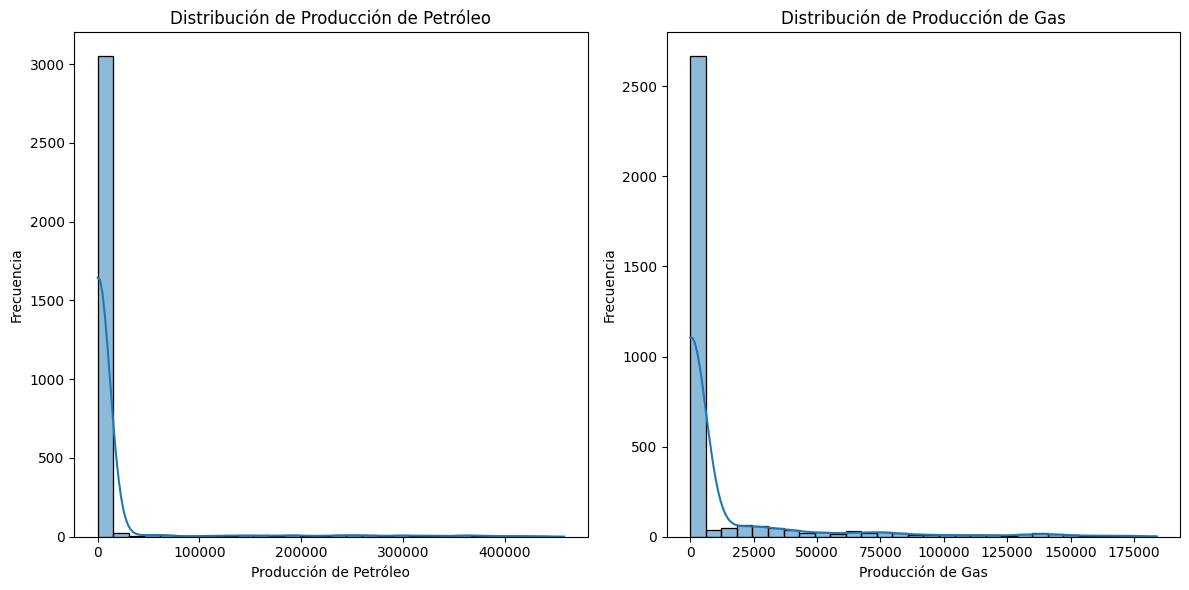

In [10]:
#histograma de Producci√≥n de Petr√≥leo y Producci√≥n de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribuci√≥n de Producci√≥n de Petr√≥leo')
plt.xlabel('Producci√≥n de Petr√≥leo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribuci√≥n de Producci√≥n de Gas')
plt.xlabel('Producci√≥n de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [11]:
# Calcular rango intercuatilico para produccion de petroleo y gas

# Calcular el Rango Intercuart√≠lico (IQR) para la Producci√≥n de Petr√≥leo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuart√≠lico para Producci√≥n de Petr√≥leo: {IQR_petroleo}")
print(f"Rango Intercuart√≠lico para Producci√≥n de Gas: {IQR_gas}")

Rango Intercuart√≠lico para Producci√≥n de Petr√≥leo: 367.0
Rango Intercuart√≠lico para Producci√≥n de Gas: 1514.0


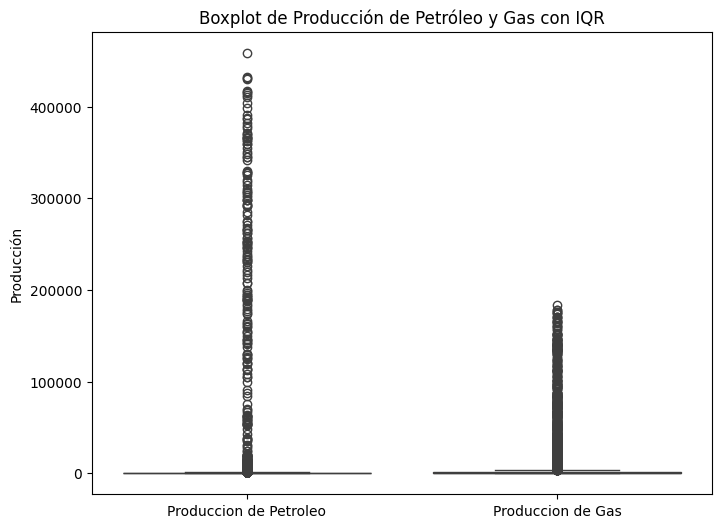

In [12]:
# rangos intercuartilicos anteriores

import matplotlib.pyplot as plt

# Crear un boxplot para visualizar los rangos intercuart√≠licos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producci√≥n de Petr√≥leo y Gas con IQR')
plt.ylabel('Producci√≥n')
plt.show()

Consultamos los valores m√°ximos y m√≠nimos para descartar que hayan datos inconsistentes en el dataset.

In [13]:
#valor m√°ximo y m√≠nimo de producci√≥n de petr√≥leo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor m√°ximo de producci√≥n de petr√≥leo: {max_produccion_petroleo}")
print(f"Valor m√≠nimo de producci√≥n de petr√≥leo: {min_produccion_petroleo}")
print(f"Valor m√°ximo de producci√≥n de gas: {max_produccion_gas}")
print(f"Valor m√≠nimo de producci√≥n de gas: {min_produccion_gas}")

Valor m√°ximo de producci√≥n de petr√≥leo: 458378.0
Valor m√≠nimo de producci√≥n de petr√≥leo: 0.0
Valor m√°ximo de producci√≥n de gas: 183923.0
Valor m√≠nimo de producci√≥n de gas: 0.0


In [14]:
# media para producci√≥n de petr√≥leo y producci√≥n de gas mensual

media_mensual = Produccion_ypf.groupby(['A√±o', 'Mes'])[
    ['Produccion de Petroleo', 'Produccion de Gas']
].mean().reset_index()

In [15]:
media_mensual = media_mensual.sort_values(['A√±o', 'Mes'])

In [16]:
print ("Media mensual de producci√≥n de petr√≥leo y gas:")
media_mensual

Media mensual de producci√≥n de petr√≥leo y gas:


A√±o   Mes  Produccion de Petroleo  Produccion de Gas
0   2021.0   1.0             7326.625000        8166.910714
1   2021.0   2.0             6955.053571        7214.446429
2   2021.0   3.0             8512.418182        8379.163636
3   2021.0   4.0             8298.400000        8279.781818
4   2021.0   5.0             8413.072727       10424.581818
5   2021.0   6.0             8118.454545       11726.218182
6   2021.0   7.0             8311.392857       12978.178571
7   2021.0   8.0             8260.070175       13286.333333
8   2021.0   9.0             9087.596491       13252.912281
9   2021.0  10.0            10248.175439       12659.719298
10  2021.0  11.0             9744.406780       12269.372881
11  2021.0  12.0            10259.466667       12530.166667
12  2022.0   1.0            10643.100000       13084.350000
13  2022.0   2.0             9499.783333       11525.583333
14  2022.0   3.0            11028.650000       12958.700000
15  2022.0   4.0            11148.700000       12110.066667
16  2022.0   5.0            11592.600000       12457.500000
17  2022.0   6.0            10910.183333       12563.416667
18  2022.0   7.0            11179.031746       12492.444444
19  2022.0   8.0            11415.095238       12381.349206
20  2022.0   9.0            11329.953125       10553.296875
21  2022.0  10.0            12312.546875       11428.125000
22  2022.0  11.0            11701.796875       10790.046875
23  2022.0  12.0            12323.703125       10953.281250
24  2023.0   1.0            12732.415385       10926.061538
25  2023.0   2.0            11448.803030        9930.696970
26  2023.0   3.0            13049.515152       10937.303030
27  2023.0   4.0            12689.424242       10427.969697
28  2023.0   5.0            13421.384615       10528.892308
29  2023.0   6.0            12896.215385       11061.938462
30  2023.0   7.0            12894.439394       11596.787879
31  2023.0   8.0            12765.313433       11266.343284
32  2023.0   9.0            13112.015152       10550.848485
33  2023.0  10.0            14626.776119        9956.343284
34  2023.0  11.0            14673.686567       11240.507463
35  2023.0  12.0            15377.705882        9918.485294
36  2024.0   1.0            15185.149254       10213.940299
37  2024.0   2.0            13866.811594        9918.246377
38  2024.0   3.0            14975.434783       10903.217391
39  2024.0   4.0            14196.434783       10929.289855
40  2024.0   5.0            14613.507246       11842.623188
41  2024.0   6.0            14182.797101       10013.579710
42  2024.0   7.0            15009.826087       11181.536232
43  2024.0   8.0            15920.200000       12055.242857
44  2024.0   9.0            16024.898551       10768.681159
45  2024.0  10.0            16488.043478        9478.942029
46  2024.0  11.0            16226.614286        8621.542857
47  2024.0  12.0            17368.942857        8821.114286
48  2025.0   1.0            17095.057143       11096.314286
49  2025.0   2.0            16669.876923       10486.369231
50  2025.0   3.0            17952.617647       10371.382353

El siguiente gr√°fico muestra la producci√≥n mensual promedio de petr√≥leo y gas desde principios de 2021 hasta marzo de 2025. A continuaci√≥n, se detallan las observaciones clave:

**Petr√≥leo (l√≠nea azul):**

* Presenta una tendencia creciente a lo largo del tiempo.

* Comienza en valores cercanos a los 7.000-8.000 y alcanza m√°s de 18.000 hacia marzo de 2025.

* Tiene fluctuaciones mensuales, pero el crecimiento es sostenido.

**Gas (l√≠nea naranja):**

* Muestra un comportamiento m√°s irregular.

* Se observa un r√°pido crecimiento inicial en 2021, alcanzando un pico en la segunda mitad de ese a√±o.

* Luego, la producci√≥n de gas oscila entre 10.000 y 13.000 aproximadamente, sin una tendencia clara de crecimiento o disminuci√≥n sostenida.

* En algunos periodos recientes (fines de 2024), se ve una leve disminuci√≥n.

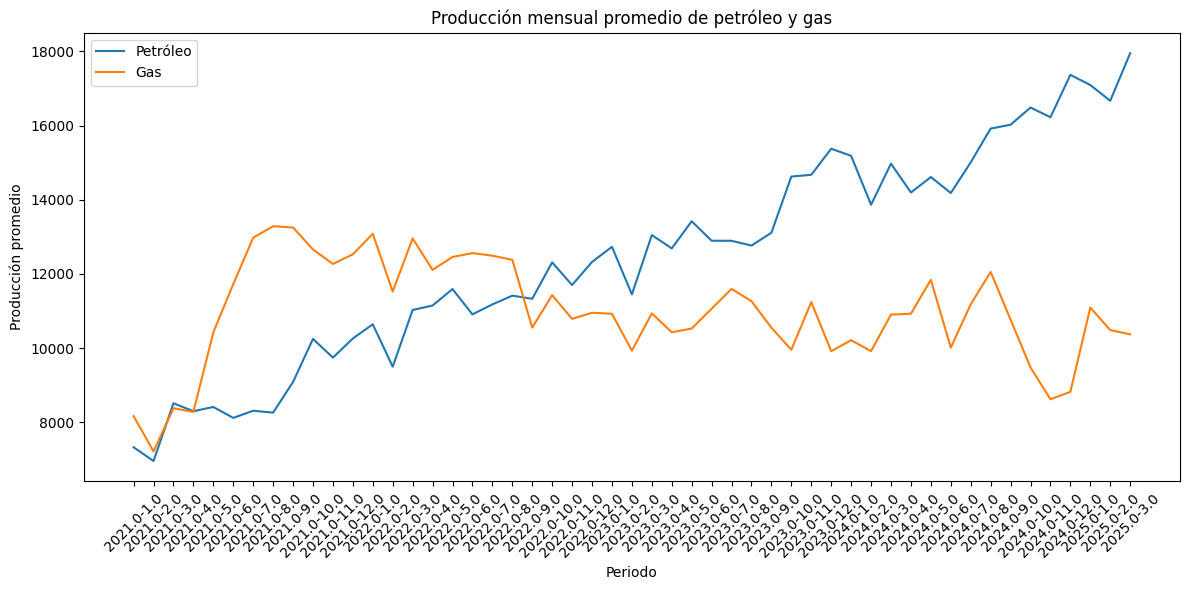

In [17]:
# Crear una columna "label" tipo 'YYYY-MM' para el eje X
media_mensual['Periodo'] = media_mensual['A√±o'].astype(str) + '-' + media_mensual['Mes'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Petroleo'], label='Petr√≥leo')
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Gas'], label='Gas')
plt.xticks(rotation=45)
plt.xlabel('Periodo')
plt.ylabel('Producci√≥n promedio')
plt.title('Producci√≥n mensual promedio de petr√≥leo y gas')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#Con la funci√≥n columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gas√≠fero',
 'Tipo de pozo_Inyecci√≥n de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrol√≠fero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de 

In [19]:
Produccion_ypf.head(25)

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                     1.0                             0.0   
1                     1.0                             0.0   
2                     1.0                             0.0   
3                     1.0                             0.0   
4                     1.0                             0.0   
5                     1.0                             0.0   
6                     1.0                             0.0   
7                     1.0                             0.0   
8                     1.0                             0.0   
9                     1.0                             0.0   
10                    1.0                             0.0   
11                    1.0                             0.0   
12                    1.0                             0.0   
13                    1.0                             0.0   
14                    1.0                             0.0   
15                    1.0                             0.0   
16                    1.0                             0.0   
17                    1.0                             0.0   
18                    1.0                             0.0   
19                    1.0                             0.0   
20                    1.0                             0.0   
21                    1.0                             0.0   
22                    1.0                             0.0   
23                    1.0                             0.0   
24                    1.0                             0.0   

    Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                      0.0                       0.0                    0.0   
1                      0.0                       0.0                    0.0   
2                      0.0                       0.0                    0.0   
3                      0.0                       0.0                    0.0   
4                      0.0                       0.0                    0.0   
5                      0.0                       0.0                    0.0   
6                      0.0                       0.0                    0.0   
7                      0.0                       0.0                    0.0   
8                      0.0                       0.0                    0.0   
9                      0.0                       0.0                    0.0   
10                     0.0                       0.0                    0.0   
11                     0.0                       0.0                    0.0   
12                     0.0                       0.0                    0.0   
13                     0.0                       0.0                    0.0   
14                     0.0                       0.0                    0.0   
15                     0.0                       0.0                    0.0   
16                     0.0                       0.0                    0.0   
17                     0.0                       0.0                    0.0   
18                     0.0                       0.0                    0.0   
19                     0.0                       0.0                    0.0   
20                     0.0                       0.0                    0.0   
21                     0.0                       0.0                    0.0   
22                     0.0                       0.0                    0.0   
23                     0.0                       0.0                    0.0   
24                     0.0                       0.0                    0.0   

    Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                               1.0                       1.0   
1                               1.0                       1.0   
2                               1.0                       1.0   
3                               1.0                       1.0   
4                               1.

In [20]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyecci√≥n de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producci√≥n de agua',
    'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la funci√≥n drop eliminamos las columnas que consideramos que no son necesarias para el an√°lisis, en este caso solo dejamos las principales √°reas de permiso de concesi√≥n por producci√≥n de petr√≥leo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  Subtipo de recurso_SHALE  \
0                    1.0                       0.0                       1.0   
1                    1.0                       0.0                       1.0   
2                    1.0                       0.0                       1.0   
3                    1.0                       0.0                       1.0   
4                    1.0                       0.0                       1.0   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                       0.0                                              1.0   
1                       0.0                                              1.0   
2                       0.0                                              1.0   
3                       0.0                                              1.0   
4                       0.0                                              1.0   

   Area de permiso de concesion_BAJO DEL TORO    \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_BANDURRIA SUR  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Area de permiso de concesion_EL OREJANO  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_LA AMARGA CHICA  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_LA RIBERA BLOQUE I   ...  \
0                                               0.0  ...   
1                                               0.0  ...   
2                                               0.0  ...   
3                                               0.0  ...   
4                                               0.0  ...   

   Area de permiso de concesion_NARAMBUENA  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_OCTOGONO  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                

In [21]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en n√∫meros enteros

Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  \
0                         1                         0   
1                         1                         0   
2                         1                         0   
3                         1                         0   
4                         1                         0   
...                     ...                       ...   
3241                      0                         0   
3242                      0                         0   
3243                      0                         0   
3244                      0                         0   
3245                      0                         0   

      Subtipo de recurso_SHALE  Subtipo de recurso_TIGHT  \
0                            1                         0   
1                            1                         0   
2                            1                         0   
3                            1                         0   
4                            1                         0   
...                        ...                       ...   
3241                         1                         0   
3242                         1                         0   
3243                         1                         0   
3244                         1                         0   
3245                         1                         0   

      Area de permiso de concesion_AGUADA DE LA ARENA  \
0                                                   1   
1                                                   1   
2                                                   1   
3                                                   1   
4                                                   1   
...                                               ...   
3241                                                0   
3242                                                0   
3243                                                0   
3244                                                0   
3245                                                0   

      Area de permiso de concesion_BAJO DEL TORO    \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
3241                                             0   
3242                                             0   
3243                                             0   
3244                                             0   
3245                                             0   

      Area de permiso de concesion_BANDURRIA SUR  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
3241                                           0   
3242                                           0   
3243                                           0   
3244                                           0   
3245                                           0   

      Area de permiso de concesion_EL OREJANO  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
3241                                        0   
3242                                        0   
3243                                        0   
3244                                        0   
3245                                        0   

      Area de permiso de concesion_LA AMARGA CHICA

In [22]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la funci√≥n columns para visualizar como qued√≥ el dataset con las columnas eliminadas, ahora son 29 columnas

['Tipo de pozo_Gas√≠fero',
 'Tipo de pozo_Petrol√≠fero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGR

### **Regresi√≥n Lineal**

La regresi√≥n lineal es un modelo estad√≠stico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o m√°s variables independientes (predictoras). En su forma m√°s simple (regresi√≥n lineal simple), ajusta una l√≠nea recta a los datos con la f√≥rmula:

ùë¶ = ùëé + ùëè ‚ãÖ ùë•

donde:

y es la variable dependiente,
x es la variable independiente,
a es la intersecci√≥n con el eje Y (intercepto),
b es la pendiente de la recta (coeficiente).

In [23]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petr√≥leo y Producci√≥n de gas

In [24]:
x = Produccion_ypf.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [25]:
x.head()

Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  Subtipo de recurso_SHALE  \
0                    1.0                       0.0                       1.0   
1                    1.0                       0.0                       1.0   
2                    1.0                       0.0                       1.0   
3                    1.0                       0.0                       1.0   
4                    1.0                       0.0                       1.0   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                       0.0                                              1.0   
1                       0.0                                              1.0   
2                       0.0                                              1.0   
3                       0.0                                              1.0   
4                       0.0                                              1.0   

   Area de permiso de concesion_BAJO DEL TORO    \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_BANDURRIA SUR  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Area de permiso de concesion_EL OREJANO  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_LA AMARGA CHICA  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_LA RIBERA BLOQUE I   ...  \
0                                               0.0  ...   
1                                               0.0  ...   
2                                               0.0  ...   
3                                               0.0  ...   
4                                               0.0  ...   

   Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   Area de permiso de concesion_LOS CALDENES  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Area de permiso de concesion_NARAMBUENA  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_OCTOGONO  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                             

In [26]:
lista_atributos = x.columns

In [27]:
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [28]:
x, y =np.array(x), np.array(y)

In [29]:
x

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        3.000e+00]])

In [30]:
y[:10]

array([[  555., 18699.],
       [  472., 14314.],
       [ 1082., 19413.],
       [  678., 20456.],
       [ 2594., 25454.],
       [ 3382., 34763.],
       [ 2267., 66193.],
       [ 2824., 72976.],
       [ 2671., 73914.],
       [ 1513., 73796.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relaci√≥n entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempe√±o del modelo con datos que no ha visto antes, simulando c√≥mo funcionar√° con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [31]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [33]:
x.shape

(3246, 26)

In [34]:
X_train.shape

(2596, 26)

In [35]:
y_test.shape

(650, 2)

In [36]:
X_test.shape

(650, 26)

In [37]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

**Interpretaci√≥n del gr√°fico**

* Ambos modelos presentan outliers (residuos muy altos o muy bajos), especialmente el de Petr√≥leo.

* Hay residuos del modelo de Petr√≥leo que superan los +250,000 y bajan a -100,000, lo cual es significativo.

* La mediana de los residuos en ambos casos est√° cerca de cero (lo cual es bueno), pero hay m√°s asimetr√≠a y dispersi√≥n en el modelo de Petr√≥leo.

* El modelo de Gas tiene residuos m√°s concentrados y menos extremos ‚Üí mejor comportamiento en cuanto a error.

**Conclusi√≥n:**

* El modelo predice el Gas con menor error y mayor consistencia que el Petr√≥leo.

* El modelo de Petr√≥leo tiene mayor varianza en sus residuos, lo que puede indicar:

1. Variables predictoras insuficientes o poco informativas.

2. Heterocedasticidad.

3. Outliers reales o errores de medici√≥n.

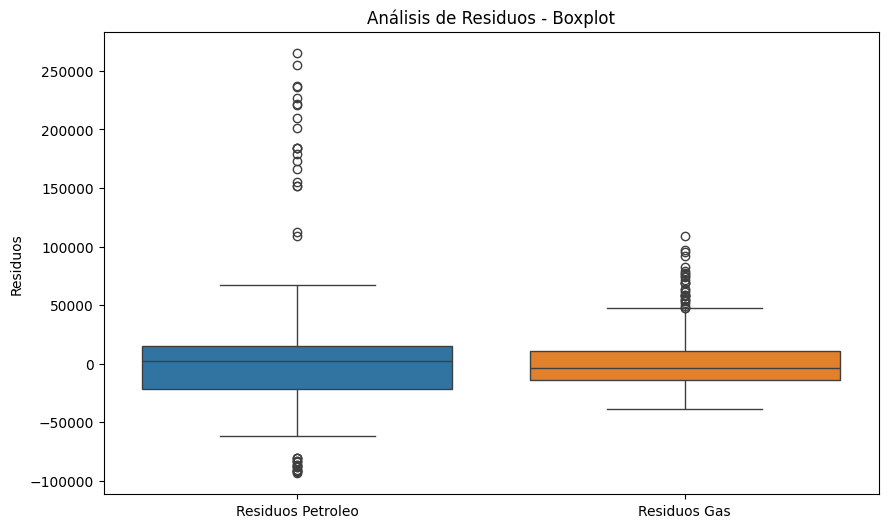

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('An√°lisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()


**An√°lisis del gr√°fico: Producci√≥n Real vs. Predicha (Regresi√≥n Lineal)**

* El gr√°fico compara los valores reales de producci√≥n de petr√≥leo (eje X) con los valores predichos por el modelo (eje Y).

* Idealmente, si el modelo predijera perfectamente, todos los puntos estar√≠an alineados sobre la diagonal que va del origen (0,0) hacia la parte superior derecha (l√≠nea y = x).

**Observaciones principales:**

* Distribuci√≥n dispersa y agrupada en torno a cero:

Hay una gran concentraci√≥n de puntos en valores cercanos a cero en el eje X (producci√≥n real), con una amplia dispersi√≥n en el eje Y (predicciones).

Esto indica que el modelo realiza predicciones err√°ticas cuando la producci√≥n real es baja, incluso arrojando valores negativos, lo cual no es f√≠sicamente posible en este contexto.

* Subestimaci√≥n y sobreestimaci√≥n:

En los valores intermedios y altos de producci√≥n real, las predicciones tienden a concentrarse en un rango fijo, aproximadamente entre 100.000 y 150.000.

Esto sugiere que el modelo no est√° captando adecuadamente la variabilidad en los niveles altos de producci√≥n: predice valores similares para distintas producciones reales.
.

**An√°lisis de gr√°fico: Distribuci√≥n de los Errores de Predicci√≥n: Petr√≥leo vs. Gas**

Este histograma representa la distribuci√≥n de los errores de predicci√≥n, es decir, la diferencia entre los valores reales y los predichos por los modelos aplicados a la producci√≥n de petr√≥leo y gas.

* **Errores de Petr√≥leo (azul):**

La distribuci√≥n presenta una asimetr√≠a hacia la derecha (cola positiva), lo que indica que el modelo tiende a subestimar la producci√≥n en varios casos.

Aunque la mayor√≠a de los errores se concentran cerca de 0, hay una dispersi√≥n significativa, con errores que superan los ¬±200.000.

Esto refleja una mayor variabilidad e imprecisi√≥n en las predicciones del modelo aplicado al petr√≥leo.

**Errores de Gas (naranja):**

Los errores est√°n m√°s concentrados en torno a 0, lo que sugiere una mayor precisi√≥n del modelo de gas.

La distribuci√≥n es m√°s estrecha y sim√©trica, con menor dispersi√≥n de valores extremos.

Esto puede indicar que el modelo captura mejor los patrones subyacentes en los datos de gas.

**Conclusiones:**

El modelo para gas muestra un comportamiento m√°s estable y preciso, con errores m√°s peque√±os y centrados.

En cambio, el modelo de petr√≥leo presenta una mayor dispersi√≥n y errores extremos, lo que podr√≠a implicar:

* Mayor complejidad en los datos del petr√≥leo.

* Necesidad de mejorar el preprocesamiento o el ajuste del modelo.

* Inclusi√≥n de nuevas variables explicativas o uso de otro algoritmo.

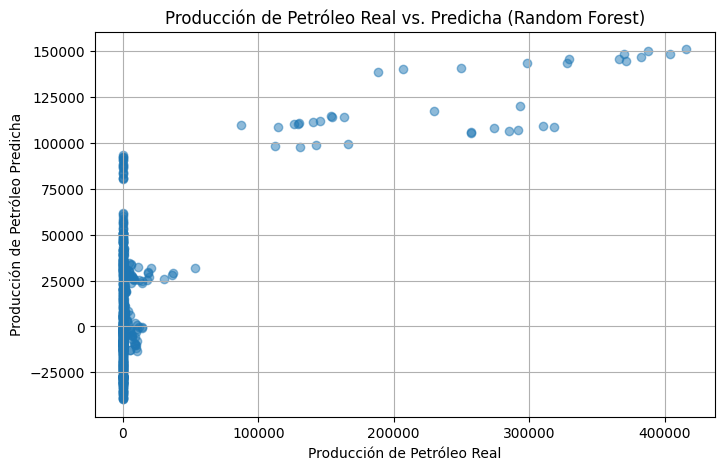

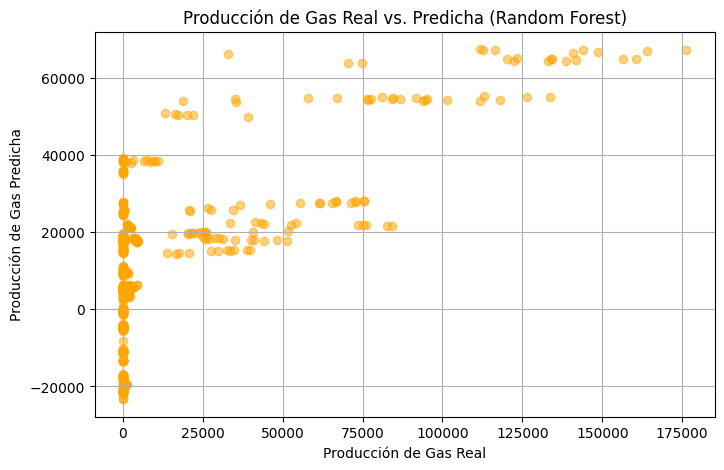

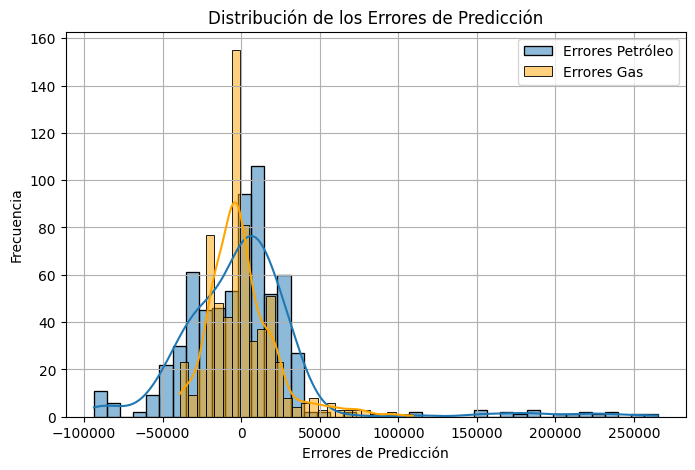

In [39]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producci√≥n de Petr√≥leo Real')
plt.ylabel('Producci√≥n de Petr√≥leo Predicha')
plt.title('Producci√≥n de Petr√≥leo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producci√≥n de Gas Real')
plt.ylabel('Producci√≥n de Gas Predicha')
plt.title('Producci√≥n de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Tambi√©n puedes visualizar la distribuci√≥n de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petr√≥leo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicci√≥n')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de los Errores de Predicci√≥n')
plt.legend()
plt.grid(True)
plt.show()


**An√°lisis de Gr√°fico de Residuos vs. Valores predichos**

**Petr√≥leo**

* Se observa una dispersi√≥n creciente a medida que aumentan los valores predichos.

* Muchos residuos se alejan bastante del eje cero en los extremos (sobre todo valores altos predichos).

* Esto indica heterocedasticidad: los errores no tienen varianza constante.

**Gas**

* Aunque hay cierta variabilidad, la dispersi√≥n es m√°s uniforme a lo largo del eje X.

* Aun as√≠, parece haber una mayor concentraci√≥n de residuos cuando los valores predichos son bajos.

* Hay indicios leves de heterocedasticidad, pero es mucho menor que en el caso del petr√≥leo.

**Q-Q plots (Quantile-Quantile plots) de los residuos para la predicci√≥n de producci√≥n de petr√≥leo (izquierda) y producci√≥n de gas (derecha)**

Un Q-Q plot compara la distribuci√≥n de los residuos observados con una distribuci√≥n normal te√≥rica:

Si los puntos se alinean con la l√≠nea roja diagonal, los residuos siguen una distribuci√≥n normal.

Las desviaciones indican presencia de asimetr√≠as, colas pesadas o outliers.

**Gr√°fico izquierdo ‚Äì Petr√≥leo:**

* Los residuos se desv√≠an considerablemente de la l√≠nea roja, especialmente en las colas.

* Esto indica que los errores no siguen una distribuci√≥n normal, con presencia de outliers extremos tanto negativos como positivos.

* Hay asimetr√≠a positiva, con muchos errores grandes en exceso (sobreestimaciones).

**Gr√°fico derecho ‚Äì Gas:**

* Aunque tambi√©n hay desviaciones, la curva sigue m√°s de cerca la diagonal en el centro.

* Las colas muestran cierta asimetr√≠a y presencia de outliers, pero menos pronunciada que en el gr√°fico del petr√≥leo.

* El modelo para gas tiene residuos m√°s cercanos a la normalidad, aunque a√∫n no perfecta.

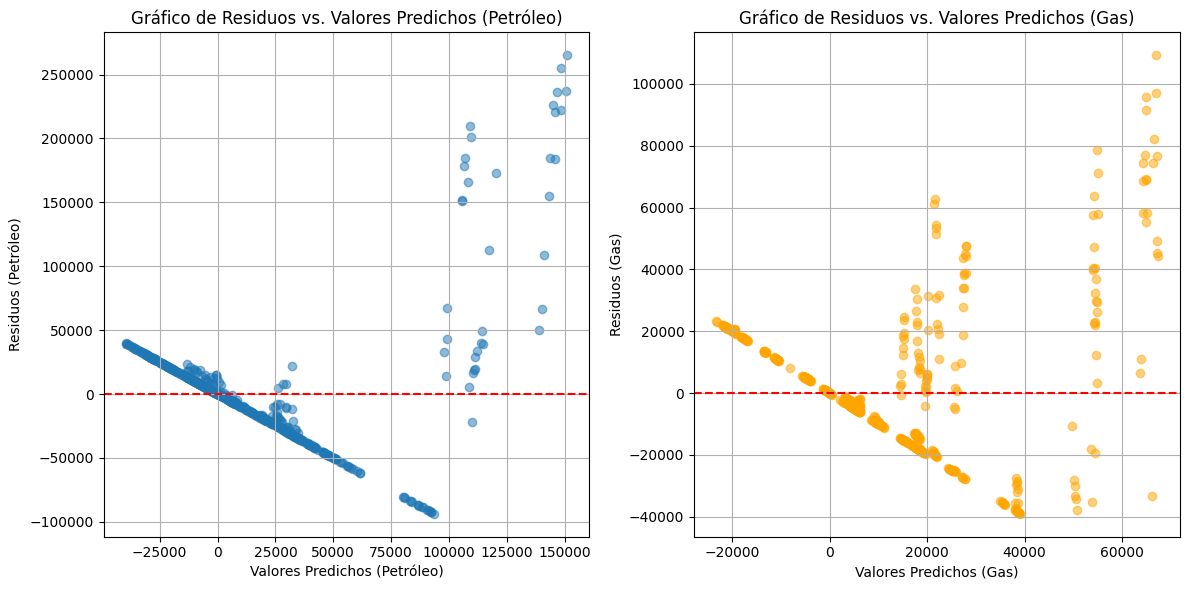

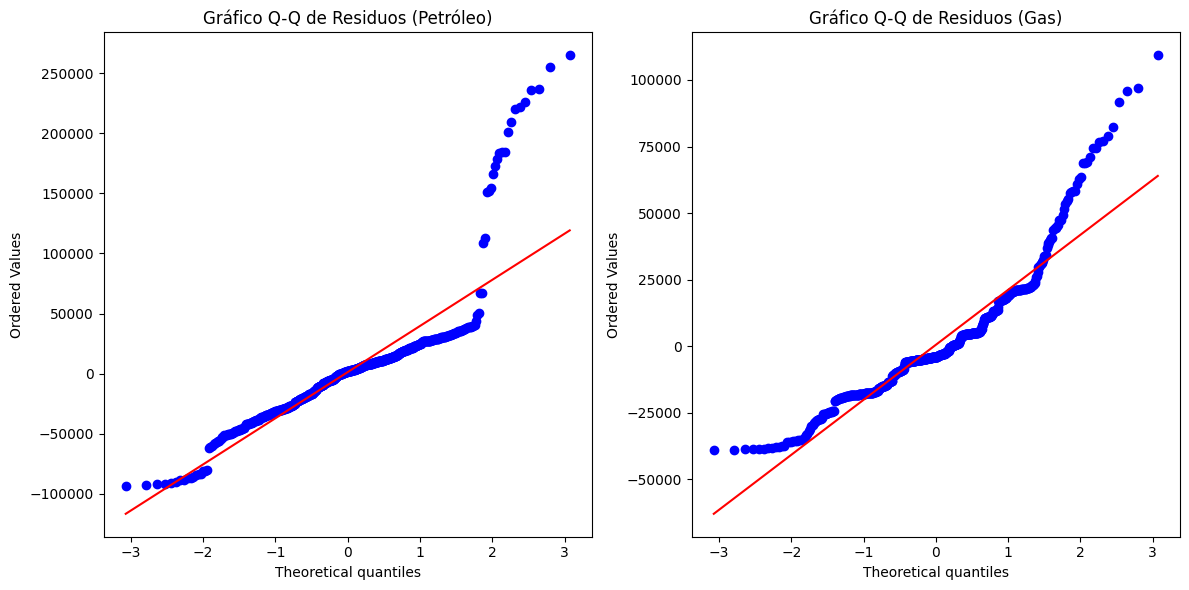

In [40]:
#gr√°fico de residuos

import matplotlib.pyplot as plt
# Generar gr√°fico de residuos vs. valores predichos
plt.figure(figsize=(12, 6))

# Gr√°fico de residuos para Produccion de Petroleo
plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals[:, 0], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos (Petr√≥leo)')
plt.ylabel('Residuos (Petr√≥leo)')
plt.title('Gr√°fico de Residuos vs. Valores Predichos (Petr√≥leo)')
plt.grid(True)

# Gr√°fico de residuos para Produccion de Gas
plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals[:, 1], alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos (Gas)')
plt.ylabel('Residuos (Gas)')
plt.title('Gr√°fico de Residuos vs. Valores Predichos (Gas)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Gr√°fico Q-Q para verificar la normalidad de los residuos
plt.figure(figsize=(12, 6))

# Gr√°fico Q-Q para residuos de Petr√≥leo
plt.subplot(1, 2, 1)
stats.probplot(residuals[:, 0], dist="norm", plot=plt)
plt.title('Gr√°fico Q-Q de Residuos (Petr√≥leo)')

# Gr√°fico Q-Q para residuos de Gas
plt.subplot(1, 2, 2)
stats.probplot(residuals[:, 1], dist="norm", plot=plt)
plt.title('Gr√°fico Q-Q de Residuos (Gas)')

plt.tight_layout()
plt.show()

**Normalidad de los errores**

Con el histograma se puede visualizar la distribuci√≥n normal de los errores.

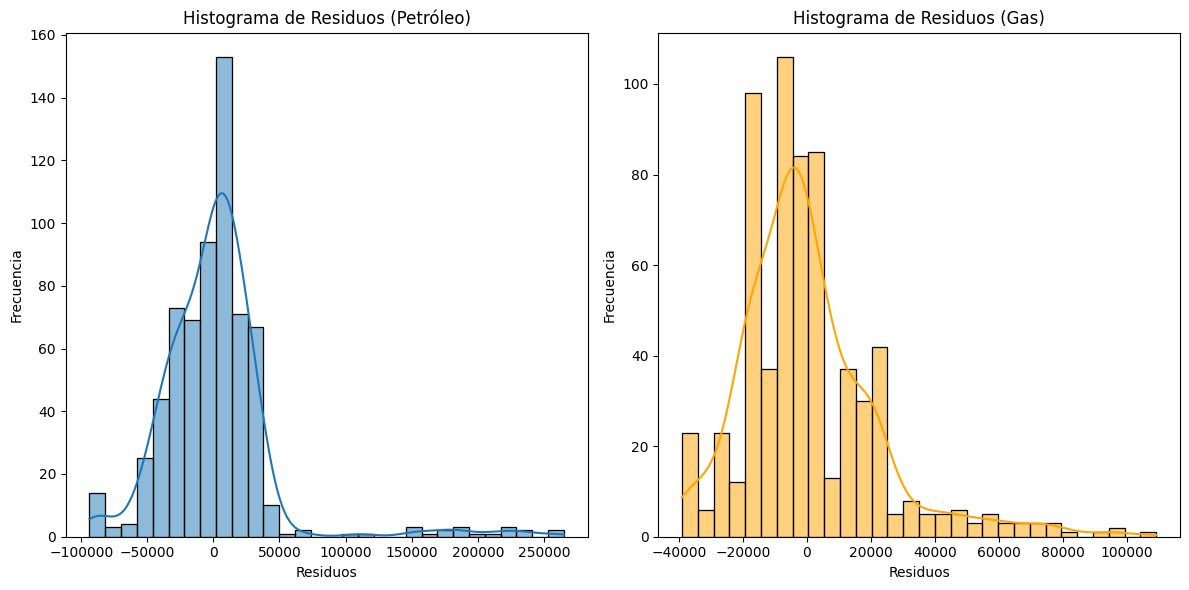

In [41]:
# Histograma de residuos

import matplotlib.pyplot as plt
# Crear histogramas para los residuos
plt.figure(figsize=(12, 6))

# Histograma para residuos de Petr√≥leo
plt.subplot(1, 2, 1)
sns.histplot(residuals[:, 0], kde=True, bins=30)
plt.title('Histograma de Residuos (Petr√≥leo)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Histograma para residuos de Gas
plt.subplot(1, 2, 2)
sns.histplot(residuals[:, 1], kde=True, bins=30, color='orange')
plt.title('Histograma de Residuos (Gas)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### **Random Forest**

Random Forest es un modelo de aprendizaje autom√°tico basado en un conjunto de √°rboles de decisi√≥n. Funciona creando m√∫ltiples √°rboles con diferentes subconjuntos del dataset y promediando sus predicciones (en regresi√≥n). Esto mejora la precisi√≥n y robustez del modelo, reduciendo el riesgo de sobreajuste que suele tener un √∫nico √°rbol.

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [45]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [46]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[     0.   ,      0.   ],
       [119963.625,  22186.45 ],
       [   302.1  ,    163.2  ],
       ...,
       [     0.   ,      0.   ],
       [ 24715.8  ,   3100.35 ],
       [   206.35 ,   8435.575]])

**MAE (Mean Absolute Error)**

El MAE es una m√©trica que mide el error promedio entre los valores reales y los valores predichos por un modelo. Se calcula tomando el promedio de las diferencias absolutas. Es f√°cil de interpretar porque mantiene las mismas unidades que la variable objetivo. Cuanto menor es el MAE, mejor es la precisi√≥n del modelo.

In [48]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

10260.894480769231

In [49]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: nan%


<ipython-input-49-603633143>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-49-603633143>:1: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


**√Årbol de Decisi√≥n del Modelo Random Forest**

Este √°rbol muestra c√≥mo el modelo toma decisiones dividiendo los datos en funci√≥n de distintas variables, como profundidad, √°rea de concesi√≥n, tipo de pozo, etc. En cada nodo, se realiza una divisi√≥n basada en un umbral que minimiza el error absoluto. Los valores en los nodos incluyen:

* samples: cantidad de muestras que llegan a ese nodo.

* value: valor promedio predicho.

* absolute_error: error absoluto promedio en ese nodo.

Esto ayuda a interpretar qu√© variables fueron m√°s relevantes para las predicciones del modelo.

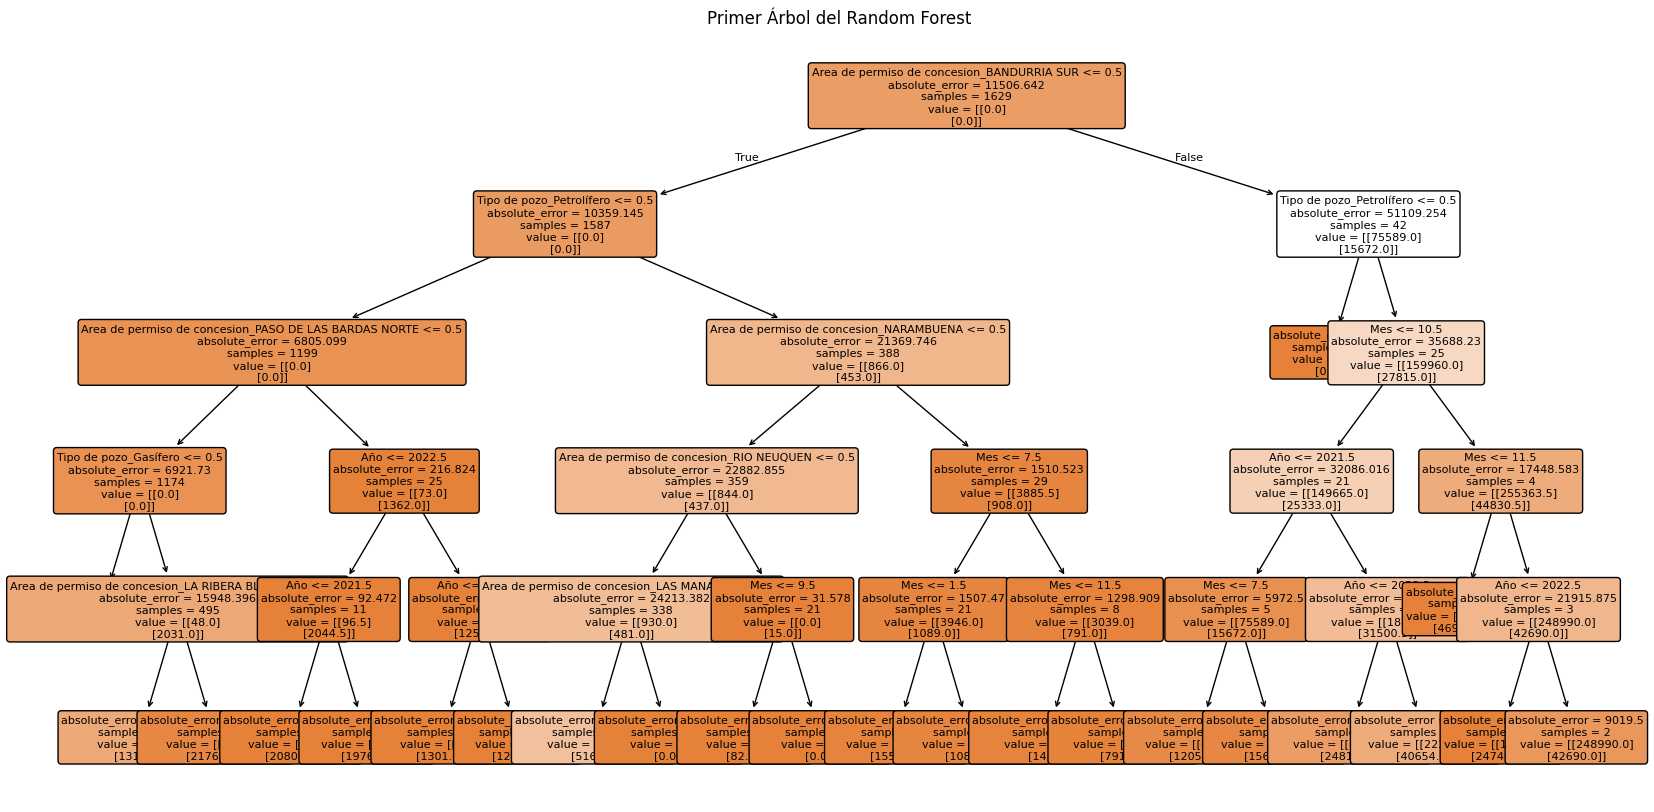

In [50]:
# Gr√°fico de √°rbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer √°rbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Aseg√∫rate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer √Årbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")


### **Support Vector Machine**

Support Vector Machine (SVM) es un modelo de aprendizaje supervisado que utilizamos para predecir variables clave del sector energ√©tico, como la producci√≥n de petr√≥leo y gas. SVM busca el hiperplano que mejor separa los datos hist√≥ricos, maximizando el margen entre los distintos niveles de producci√≥n. Adem√°s, permite aplicar funciones n√∫cleo (kernels) para capturar relaciones no lineales entre variables.

In [51]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [52]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [53]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [54]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[0.09992009, 0.09987949],
       [0.10021708, 0.10022631],
       [0.10012096, 0.10015563],
       ...,
       [0.09995772, 0.09994865],
       [0.10020436, 0.10019377],
       [0.10002332, 0.10014291]])

MAE: 13.124,61
Este valor indica que el modelo SVM tiene un error promedio de m√°s de 13 mil unidades por predicci√≥n.
Refleja una baja precisi√≥n al trabajar con el dataset agrupado, posiblemente por alta variabilidad interna o presencia de outliers.

In [55]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

13124.606995389984

**An√°lisis del gr√°fico de la Producci√≥n de Petr√≥leo Real vs. Predicha (SVR)**

En este gr√°fico de dispersi√≥n se observa la relaci√≥n entre la producci√≥n real de petr√≥leo y las predicciones realizadas por el modelo SVR (Support Vector Regression).

El modelo no logra capturar adecuadamente la variabilidad de los datos reales, ya que predice casi un valor constante (~0.1) independientemente del valor real. Esto indica un sobreajuste extremo o una mala parametrizaci√≥n del modelo, resultando en una baja capacidad predictiva.

**An√°lisis del gr√°fico de la Producci√≥n de Gas Real vs. Predicha (SVR)**

El gr√°fico muestra la comparaci√≥n entre la producci√≥n real de gas y las predicciones generadas por el modelo SVR (Support Vector Regression). Se observa una gran dispersi√≥n de los puntos y una falta de correlaci√≥n clara entre los valores reales y los predichos, lo que evidencia un desempe√±o deficiente del modelo para capturar la din√°mica de la variable objetivo.

Este comportamiento nos sugiere que el modelo no est√° generalizando correctamente y podr√≠a necesitar un mejor ajuste de par√°metros o un preprocesamiento m√°s adecuado de los datos.

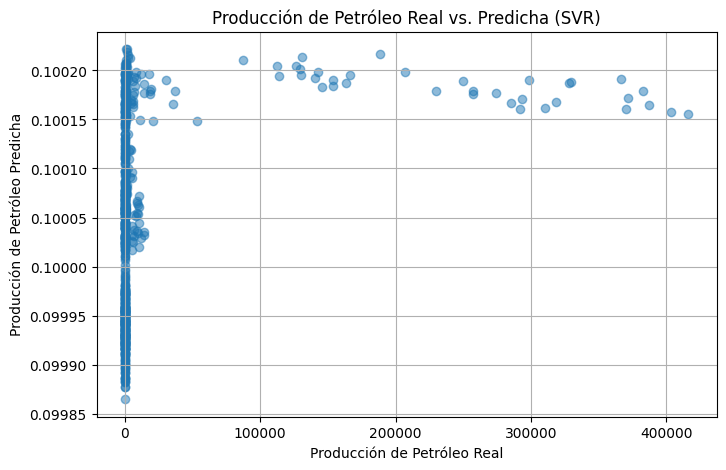

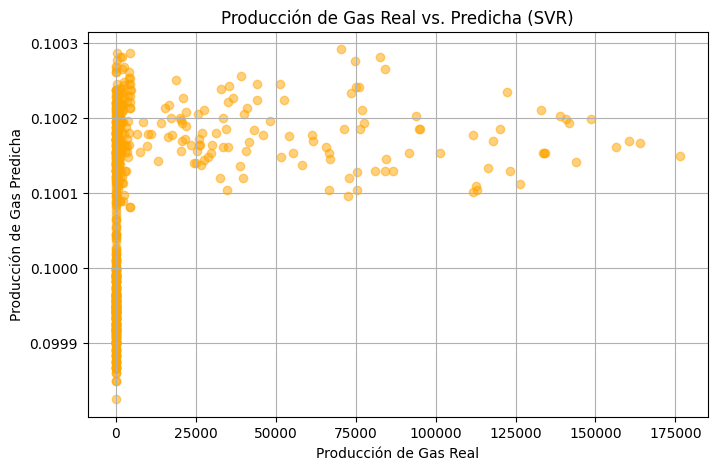

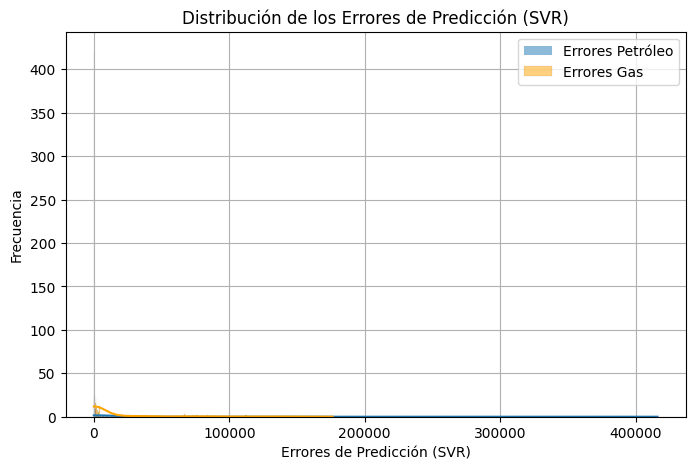

In [56]:
# gr√°fico support vector machine para este caso

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producci√≥n de Petr√≥leo Real')
plt.ylabel('Producci√≥n de Petr√≥leo Predicha')
plt.title('Producci√≥n de Petr√≥leo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producci√≥n de Gas Real')
plt.ylabel('Producci√≥n de Gas Predicha')
plt.title('Producci√≥n de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Tambi√©n puedes visualizar la distribuci√≥n de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petr√≥leo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicci√≥n (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de los Errores de Predicci√≥n (SVR)')
plt.legend()
plt.grid(True)
plt.show()


### **XGBoost**

XGBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en √°rboles de decisi√≥n, dise√±ado para lograr alta precisi√≥n y eficiencia. Utiliza la t√©cnica de boosting, que construye m√∫ltiples √°rboles de manera secuencial, donde cada √°rbol nuevo corrige los errores del anterior.

En este proyecto, XGBoost se aplica para predecir la producci√≥n de petr√≥leo y la producci√≥n de gas, utilizando como variables explicativas datos hist√≥ricos como las √°reas de permiso de concesi√≥n, el subtipo de recurso, el tipo de pozo, etc.

Gracias a su capacidad para manejar relaciones no lineales y su mecanismo de regularizaci√≥n, XGBoost resulta especialmente √∫til para modelar fen√≥menos complejos del sector energ√©tico con gran precisi√≥n.

In [57]:
from xgboost import XGBRegressor

In [58]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresi√≥n
    random_state=42
)

In [59]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
y_pred_xgb = modelo_xgb.predict(X_test)

**Evaluaci√≥n del modelo XGBoost**

**MAE (Mean Absolute Error): 3541.71**
El error absoluto medio representa la magnitud promedio de los errores en las predicciones, sin considerar si son positivos o negativos. En este caso, el modelo tiene un error promedio de aproximadamente 3541 unidades, lo cual indica cu√°n lejos est√°n, en promedio, las predicciones de los valores reales.

**RMSE (Root Mean Squared Error): 7579.92**
La ra√≠z del error cuadr√°tico medio penaliza m√°s fuertemente los errores grandes (por elevar al cuadrado las diferencias antes de promediarlas). Un RMSE de 7579.92 sugiere que, aunque el error medio absoluto es bajo, existen algunos casos con errores m√°s altos que impactan esta m√©trica. Es √∫til para detectar posibles outliers o variabilidad significativa.

**R¬≤ (Coeficiente de determinaci√≥n): 0.9568**
Este valor indica el porcentaje de la variabilidad de la variable dependiente que el modelo es capaz de explicar. En este caso, un R¬≤ de 0.9568 significa que el 95.68% de la variabilidad en la producci√≥n real est√° siendo explicada por el modelo, lo cual es un excelente desempe√±o.

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

MAE: 3541.71227182425
RMSE: 7579.920128684703
R¬≤: 0.9567754942439126


### **Optimizaci√≥n: Gridsearch**

GridSearch es una t√©cnica que prueba todas las combinaciones posibles de un conjunto definido de valores para los hiperpar√°metros del modelo. Eval√∫a cada combinaci√≥n usando validaci√≥n cruzada y selecciona la que da el mejor resultado seg√∫n una m√©trica.

En el caso de XGBoost, algunos hiperpar√°metros comunes que se optimizan son:

* n_estimators: n√∫mero de √°rboles a entrenar.

* max_depth: profundidad m√°xima de cada √°rbol.

* learning_rate: cu√°nto ajusta cada √°rbol nuevo los errores del anterior.

* subsample: proporci√≥n de muestras usadas en cada √°rbol.

* colsample_bytree: proporci√≥n de caracter√≠sticas utilizadas por √°rbol.

* gamma, reg_alpha, reg_lambda: par√°metros de regularizaci√≥n.

In [62]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores par√°metros:", grid_search.best_params_)

Mejores par√°metros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1}


In [63]:
best_model = grid_search.best_estimator_

**Evaluaci√≥n del modelo XGBoost Optimizado (GridSearch)**

**MAE (Mean Absolute Error): 2425.88**
El error absoluto medio baj√≥ a 2425.88, lo que significa que el modelo mejorado comete un error promedio menor en sus predicciones respecto al modelo anterior. Esto indica una mejora en la precisi√≥n general.

**RMSE (Root Mean Squared Error): 6447.63**
La ra√≠z del error cuadr√°tico medio tambi√©n se redujo a 6447.63. Dado que esta m√©trica penaliza m√°s los errores grandes, una reducci√≥n en el RMSE implica que el modelo ahora es m√°s robusto frente a valores at√≠picos o predicciones muy desviadas.

**R¬≤ (Coeficiente de determinaci√≥n): 0.9666**
El coeficiente de determinaci√≥n subi√≥ a 0.9666, lo que implica que el modelo ahora explica el 96.66% de la variabilidad en los datos reales. Esto representa una mejora en la capacidad explicativa del modelo.

**Conclusi√≥n:** la optimizaci√≥n del modelo mediante GridSearch mejor√≥ significativamente su desempe√±o en todas las m√©tricas. Esto demuestra que la b√∫squeda de hiperpar√°metros adecuados tuvo un impacto positivo, haciendo el modelo m√°s preciso y confiable.

In [64]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

MAE: 2425.8764956210207
RMSE: 6447.626699963413
R¬≤: 0.9666041785545363


**Gr√°fico de Producci√≥n Real vs. Predicha (XGBoost Optimizado con datos agrupados)**

* El gr√°fico muestra una fuerte alineaci√≥n de los puntos a lo largo de la diagonal, lo que indica una alta precisi√≥n del modelo.

* XGBoost logr√≥ capturar correctamente la relaci√≥n en los datos agrupados, con predicciones muy cercanas a los valores reales.

* Se observa bajo sesgo y buena generalizaci√≥n, especialmente en rangos altos de producci√≥n.

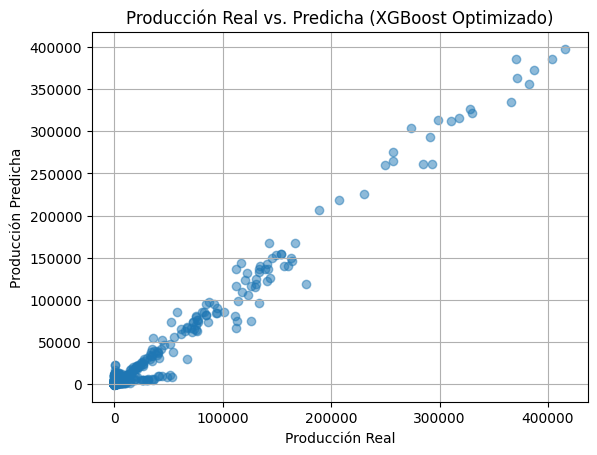

In [65]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producci√≥n Real")
plt.ylabel("Producci√≥n Predicha")
plt.title("Producci√≥n Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

**Distribuci√≥n de Residuos (Petr√≥leo y Gas)**

Ambos histogramas muestran la dispersi√≥n de los errores entre los valores reales y predichos.

* En el caso del petr√≥leo, los residuos est√°n moderadamente centrados en cero, aunque con cierta asimetr√≠a y valores extremos a la derecha.

* Para el gas, la distribuci√≥n tambi√©n se concentra cerca de cero, pero con mayor sesgo hacia valores positivos, indicando una leve subestimaci√≥n del modelo en varios casos.

Ambas distribuciones presentan colas alargadas, lo que sugiere la presencia de outliers o errores at√≠picos.

**Residuos vs. Predicciones (Petr√≥leo y Gas)**

Ambos gr√°ficos muestran los residuos en funci√≥n de las predicciones del modelo.

* Para petr√≥leo, se observa un patr√≥n ascendente y mayor dispersi√≥n en predicciones altas, lo que indica una posible sobrestimaci√≥n sistem√°tica del modelo.

* En el caso del gas, tambi√©n hay heterocedasticidad: los residuos tienden a aumentar con el valor predicho, lo que puede reflejar problemas de ajuste en los valores altos.

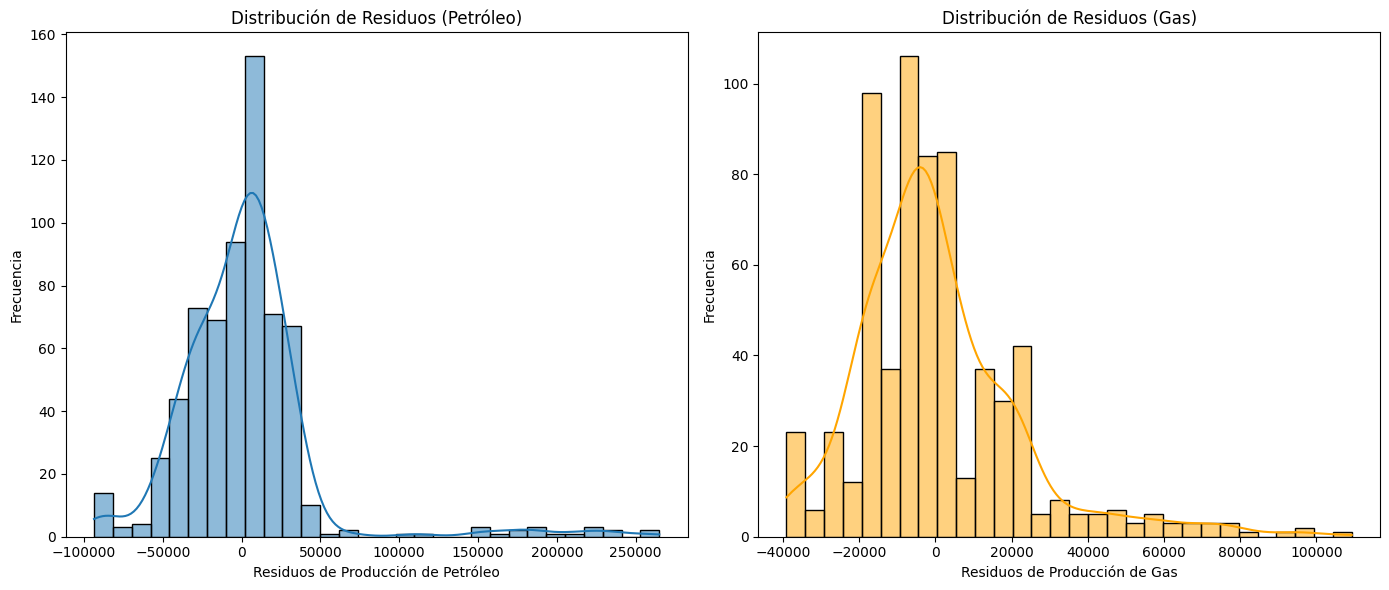

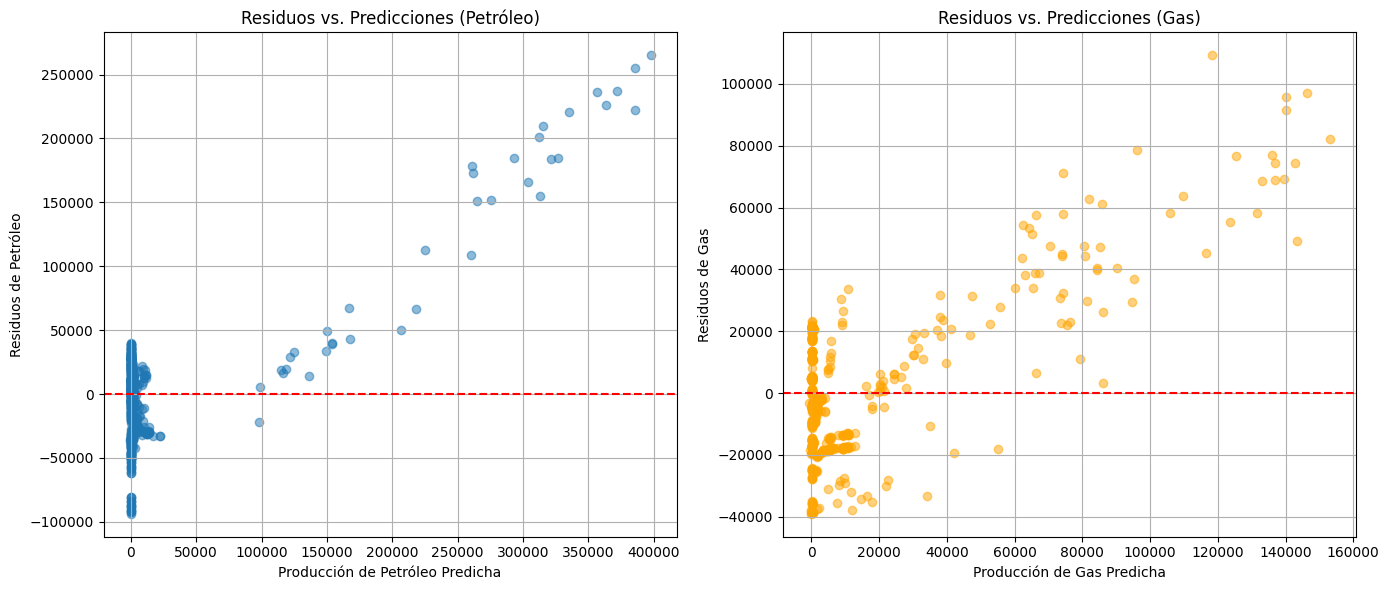

In [66]:
# grafico de produccion de petroleo y gas por separado y de los residuos

import matplotlib.pyplot as plt
# Visualizar los residuos de la regresi√≥n lineal para Petr√≥leo y Gas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_df['Residuos Petroleo'], kde=True, bins=30)
plt.title('Distribuci√≥n de Residuos (Petr√≥leo)')
plt.xlabel('Residuos de Producci√≥n de Petr√≥leo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_df['Residuos Gas'], kde=True, bins=30, color='orange')
plt.title('Distribuci√≥n de Residuos (Gas)')
plt.xlabel('Residuos de Producci√≥n de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar los residuos vs. valores predichos para identificar patrones
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_df['Residuos Petroleo'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producci√≥n de Petr√≥leo Predicha')
plt.ylabel('Residuos de Petr√≥leo')
plt.title('Residuos vs. Predicciones (Petr√≥leo)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_df['Residuos Gas'], alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producci√≥n de Gas Predicha')
plt.ylabel('Residuos de Gas')
plt.title('Residuos vs. Predicciones (Gas)')
plt.grid(True)

plt.tight_layout()
plt.show()